In [13]:
import sys
%load_ext autoreload
%autoreload 2
sys.path.append("../base")
sys.path.append("../data_provider")
sys.path.append("../models")
from common import *
from data_provider import DataProvider
import simple_linear_regression as simple_lr
import lasso_linear_regression as lasso_lr
import ridge_linear_regression as ridge_lr
import catboost_regression as catboost_r

data_provider = DataProvider()

x_train = data_provider.x_train
x_test = data_provider.x_test
y_train = data_provider.y_train
y_test = data_provider.y_test

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [14]:
def test_ridge_model():
    model = ridge_lr.build_model(x_train, y_train)
    train_prediction = model.predict(x_train)
    test_prediction = model.predict(x_test)
    print("train mape score:", mape_score(y_train, train_prediction))
    print("test mape score:", mape_score(y_test, test_prediction))
test_ridge_model()

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:112: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number8.282416e-18
  overwrite_a=True).T
../base/common.py:28: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  for i in range(len(y_data.as_matrix())):
../base/common.py:29: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  total += np.abs((y_data.as_matrix()[i][0] - prediction[i]) / y_data.as_matrix()[i][0])


train mape score: [1.04341782]
test mape score: [1.03210988]


/usr/local/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:112: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number8.307780e-21
  overwrite_a=True).T
../base/common.py:28: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  for i in range(len(y_data.as_matrix())):
../base/common.py:29: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  total += np.abs((y_data.as_matrix()[i][0] - prediction[i]) / y_data.as_matrix()[i][0])
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:112: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number8.398060e-19
  overwrite_a=True).T
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:112: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not

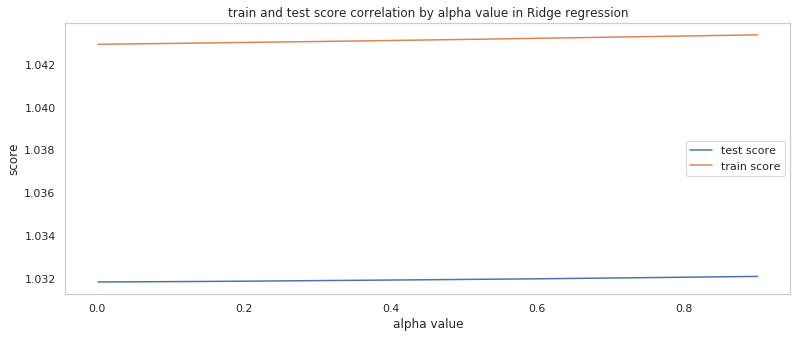

In [30]:
def draw_ridge_alpha_correlation():
    scores_train = []
    scores_test = []
    alpha_values = np.arange(0.001, 1, 0.1)
    for alpha_value in alpha_values:
        regression = ridge_lr.build_model_with_custom_alpha(x_train, y_train, alpha=alpha_value)
        train_prediction = regression.predict(x_train)
        test_prediction = regression.predict(x_test)
        scores_train.append(mape_score(y_train, train_prediction))
        scores_test.append(mape_score(y_test, test_prediction))
        
    f, (ax2) = plt.subplots(1, 1, figsize=(13, 5))

    ax2.plot(alpha_values, scores_test, label=u"test score")
    ax2.plot(alpha_values, scores_train, label=u"train score")
    ax2.set_title(u"train and test score correlation by alpha value in Ridge regression")
    ax2.set_xlabel(u"alpha value")
    ax2.set_ylabel(u"score")
    ax2.grid()
    ax2.legend()

    f.show()    
draw_ridge_alpha_correlation()

../base/common.py:28: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  for i in range(len(y_data.as_matrix())):
../base/common.py:29: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  total += np.abs((y_data.as_matrix()[i][0] - prediction[i]) / y_data.as_matrix()[i][0])
/usr/local/lib/python3.7/site-packages/matplotlib/figure.py:448: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


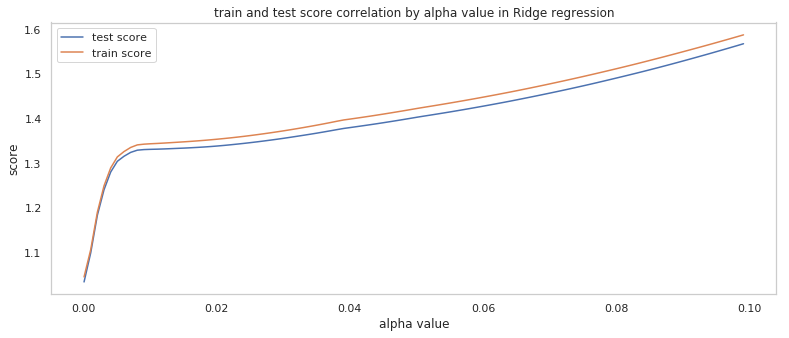

In [32]:
def draw_lasso_alpha_correlation():
    scores_train = []
    scores_test = []
    alpha_values = np.arange(0.0001, 0.1, 0.001)
    for alpha_value in alpha_values:
        regression = lasso_lr.build_model_with_custom_alpha(x_train, y_train, alpha=alpha_value)
        train_prediction = regression.predict(x_train)
        test_prediction = regression.predict(x_test)
        scores_train.append(mape_score(y_train, train_prediction))
        scores_test.append(mape_score(y_test, test_prediction))
        
    f, (ax2) = plt.subplots(1, 1, figsize=(13, 5))

    ax2.plot(alpha_values, scores_test, label=u"test score")
    ax2.plot(alpha_values, scores_train, label=u"train score")
    ax2.set_title(u"train and test score correlation by alpha value in Ridge regression")
    ax2.set_xlabel(u"alpha value")
    ax2.set_ylabel(u"score")
    ax2.grid()
    ax2.legend()

    f.show()    
draw_lasso_alpha_correlation()